In [1]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.classification import *
from sklearn.metrics import confusion_matrix



In [3]:
dta0_01 = pd.read_csv('data/raw/jan2023.csv')
dta0_02 = pd.read_csv('data/raw/fev2023.csv')
dta0_03 = pd.read_csv('data/raw/mar2023.csv')
dta0_04 = pd.read_csv('data/raw/abr2023.csv')
dta0_05 = pd.read_csv('data/raw/mai2023.csv')
dta0_06 = pd.read_csv('data/raw/jun2023.csv')
dta0_07 = pd.read_csv('data/raw/jul2023.csv')
dta0_08 = pd.read_csv('data/raw/ago2023.csv')
dta0_09 = pd.read_csv('data/raw/set2023.csv')
dta0_10 = pd.read_csv('data/raw/out2023.csv')
dta0_11 = pd.read_csv('data/raw/nov2023.csv')
data0_0 = pd.read_csv('data/raw/dez2023.csv')
data0_1 = pd.read_csv('data/raw/jan2024.csv')
data0_2 = pd.read_csv('data/raw/fev2024.csv')
data0_3 = pd.read_csv('data/raw/mar2024.csv')
data0_4 = pd.read_csv('data/raw/abr2024.csv')
data0_5 = pd.read_csv('data/raw/mai2024.csv')

feat_drop = ['Nome do fundo','CNPJ do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

feat_dropt = ['Nome do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

cpj01 = dta0_01['CNPJ do fundo'].loc[ (dta0_01['Cotistas'] > 100) & (dta0_01['Classe N1'] == 'Ações')].values
cpj02 = dta0_02['CNPJ do fundo'].loc[ (dta0_02['Cotistas'] > 100) & (dta0_02['Classe N1'] == 'Ações')].values
cpj03 = dta0_03['CNPJ do fundo'].loc[ (dta0_03['Cotistas'] > 100) & (dta0_03['Classe N1'] == 'Ações')].values
cpj04 = dta0_04['CNPJ do fundo'].loc[ (dta0_04['Cotistas'] > 100) & (dta0_04['Classe N1'] == 'Ações')].values
cpj05 = dta0_05['CNPJ do fundo'].loc[ (dta0_05['Cotistas'] > 100) & (dta0_05['Classe N1'] == 'Ações')].values     
cpj06 = dta0_06['CNPJ do fundo'].loc[ (dta0_06['Cotistas'] > 100) & (dta0_06['Classe N1'] == 'Ações')].values     
cpj07 = dta0_07['CNPJ do fundo'].loc[ (dta0_07['Cotistas'] > 100) & (dta0_07['Classe N1'] == 'Ações')].values        
cpj08 = dta0_08['CNPJ do fundo'].loc[ (dta0_08['Cotistas'] > 100) & (dta0_08['Classe N1'] == 'Ações')].values        
cpj09 = dta0_09['CNPJ do fundo'].loc[ (dta0_09['Cotistas'] > 100) & (dta0_09['Classe N1'] == 'Ações')].values        
cpj10 = dta0_10['CNPJ do fundo'].loc[ (dta0_10['Cotistas'] > 100) & (dta0_10['Classe N1'] == 'Ações')].values        
cpj11 = dta0_11['CNPJ do fundo'].loc[ (dta0_11['Cotistas'] > 100) & (dta0_11['Classe N1'] == 'Ações')].values
cnpj0 = data0_0['CNPJ do fundo'].loc[ (data0_0['Cotistas'] > 100) & (data0_0['Classe N1'] == 'Ações')].values
cnpj1 = data0_1['CNPJ do fundo'].loc[ (data0_1['Cotistas'] > 100) & (data0_1['Classe N1'] == 'Ações')].values
cnpj2 = data0_2['CNPJ do fundo'].loc[ (data0_2['Cotistas'] > 100) & (data0_2['Classe N1'] == 'Ações')].values
cnpj3 = data0_3['CNPJ do fundo'].loc[ (data0_3['Cotistas'] > 100) & (data0_3['Classe N1'] == 'Ações')].values
cnpj4 = data0_4['CNPJ do fundo'].loc[ (data0_4['Cotistas'] > 100) & (data0_4['Classe N1'] == 'Ações')].values
cnpj5 = data0_5['CNPJ do fundo'].loc[ (data0_5['Cotistas'] > 100) & (data0_5['Classe N1'] == 'Ações')].values

set1 = set(cpj01)
set2 = set(cpj02)
matches01 = list(set1.intersection(set2))
dta01  = dta0_01.loc[dta0_01['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta01 = dta01.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj02)
set2 = set(cpj03)
matches01 = list(set1.intersection(set2))
dta02  = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta02 = dta02.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj03)
set2 = set(cpj04)
matches01 = list(set1.intersection(set2))
dta03  = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta03 = dta03.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj04)
set2 = set(cpj05)
matches01 = list(set1.intersection(set2))
dta04  = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta04 = dta04.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cpj05)
set2 = set(cpj06)
matches01 = list(set1.intersection(set2))
dta05  = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta05 = dta05.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj06)
set2 = set(cpj07)
matches01 = list(set1.intersection(set2))
dta06  = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta06 = dta06.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj07)
set2 = set(cpj08)
matches01 = list(set1.intersection(set2))
dta07  = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta07 = dta07.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj08)
set2 = set(cpj09)
matches01 = list(set1.intersection(set2))
dta08  = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta08 = dta08.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj09)
set2 = set(cpj10)
matches01 = list(set1.intersection(set2))
dta09  = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta09 = dta09.merge(rent1M, how='inner', on='CNPJ do fundo')
                
set1 = set(cpj10)
set2 = set(cpj11)
matches01 = list(set1.intersection(set2))
dta10  = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta10 = dta10.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj11)
set2 = set(cnpj0)
matches01 = list(set1.intersection(set2))
dta11  = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)]
rent1M = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta11 = dta11.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cnpj0)
set2 = set(cnpj1)
matches01 = list(set1.intersection(set2))
data0  = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)]
rent1M = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data0 = data0.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj1)
set2 = set(cnpj2)
matches01 = list(set1.intersection(set2))
data1  = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)]
rent1M = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data1 = data1.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj2)
set2 = set(cnpj3)
matches01 = list(set1.intersection(set2))
data2  = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)]
rent1M = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data2 = data2.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')

data = pd.concat([ dta01, dta02, dta03, dta04, dta05, dta06, dta07, dta08, dta09, dta10, dta11, data0, data1, data2, data3], ignore_index=True)

In [4]:
data.dropna(axis=0, inplace=True)
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

data['Cluster'] = 0
data['Cluster'].loc[ data['Rentabilidade 1M'] < (data['Rentabilidade 1M'].mean() - 0.5*data['Rentabilidade 1M'].std())] = -1.0
data['Cluster'].loc[ data['Rentabilidade 1M'] > (data['Rentabilidade 1M'].mean() + 0.5*data['Rentabilidade 1M'].std())] =  1.0

data.drop(columns='Rentabilidade 1M', inplace=True)

In [5]:
data

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster
0,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,0.216315,...,0.116079,-0.455287,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,-1
1,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,0.410766,...,0.065527,0.659993,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,-1
2,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,0.410787,...,0.061409,0.638095,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,-1
3,0.047704,-0.013920,0.066603,0.285244,0.970398,0.409088,0.405237,0.434668,0.396849,0.411428,...,0.063579,0.640010,0.400717,0.433043,0.134170,0.161618,0.094179,0.103239,0.030248,-1
4,0.047510,-0.010284,0.068547,0.287934,0.975874,0.408691,0.405568,0.435969,0.398081,0.411653,...,0.073128,0.644709,0.404274,0.436656,0.144700,0.162762,0.094991,0.104080,0.032563,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,-0.007591,-0.051977,0.055684,0.152674,-0.055376,0.116088,0.124693,0.144993,0.168351,0.191376,...,-0.175467,-1.073152,-0.917392,-0.786269,-0.672546,-0.060442,-0.050526,-0.047699,-0.040722,-1
5331,-0.004306,-0.029893,0.072737,0.154346,0.005926,0.117556,0.119023,0.135884,0.152274,0.185385,...,-0.157069,-0.637490,-0.945756,-0.659452,-0.524340,-0.033645,-0.070136,-0.050102,-0.038727,-1
5332,-0.070172,-0.021925,0.036557,0.712585,1.098451,0.431202,0.326418,0.318143,0.314561,0.357922,...,0.258859,1.771320,1.507641,0.535657,0.260453,0.463405,0.378344,0.125161,0.058432,1
5333,-0.003351,-0.043341,0.081076,0.229952,0.049146,0.101575,0.122850,0.136764,0.148939,0.175971,...,-0.073108,-0.791319,-0.993638,-0.603847,-0.395843,-0.031160,-0.046582,-0.026720,-0.022061,-1


In [6]:
s = setup(data, target = 'Cluster', session_id=123, transformation = True, transformation_method='quantile', train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(5335, 73)"
5,Transformed data shape,"(5335, 73)"
6,Transformed train set shape,"(4268, 73)"
7,Transformed test set shape,"(1067, 73)"
8,Numeric features,72
9,Preprocess,True


In [7]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:52:58
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9128,0.9830,0.9128,0.9132,0.9128,0.8682,0.8684,467.6540
et,Extra Trees Classifier,0.9103,0.9830,0.9103,0.9108,0.9102,0.8641,0.8644,0.1830
rf,Random Forest Classifier,0.9053,0.9822,0.9053,0.9062,0.9053,0.8567,0.8571,0.2920
gbc,Gradient Boosting Classifier,0.8751,0.0000,0.8751,0.8758,0.8750,0.8111,0.8115,2.9690
knn,K Neighbors Classifier,0.8526,0.9528,0.8526,0.8549,0.8523,0.7767,0.7780,0.3160
dt,Decision Tree Classifier,0.8484,0.8845,0.8484,0.8500,0.8484,0.7707,0.7714,0.1770
qda,Quadratic Discriminant Analysis,0.8447,0.0000,0.8447,0.8458,0.8438,0.7661,0.7674,0.1440
lr,Logistic Regression,0.7929,0.0000,0.7929,0.7935,0.7922,0.6874,0.6883,0.4660
ridge,Ridge Classifier,0.7671,0.0000,0.7671,0.7680,0.7658,0.6493,0.6508,0.1440
lda,Linear Discriminant Analysis,0.7601,0.0000,0.7601,0.7605,0.7587,0.6386,0.6399,0.1470


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [8]:
rf = create_model('lightgbm')
#rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9063,0.9789,0.9063,0.9066,0.9061,0.8585,0.8589
1,0.9227,0.9873,0.9227,0.9236,0.9228,0.8829,0.8832
2,0.8970,0.9860,0.8970,0.8970,0.8969,0.8443,0.8443
3,0.9204,0.9880,0.9204,0.9205,0.9202,0.8796,0.8798
4,0.9180,0.9835,0.9180,0.9180,0.9179,0.8759,0.8760
5,0.9133,0.9795,0.9133,0.9149,0.9137,0.8687,0.8692
6,0.9180,0.9831,0.9180,0.9180,0.9178,0.8761,0.8763
7,0.9133,0.9798,0.9133,0.9133,0.9131,0.8690,0.8692
8,0.9131,0.9847,0.9131,0.9130,0.9130,0.8686,0.8687


In [10]:
#trf = tune_model('lightgbm')

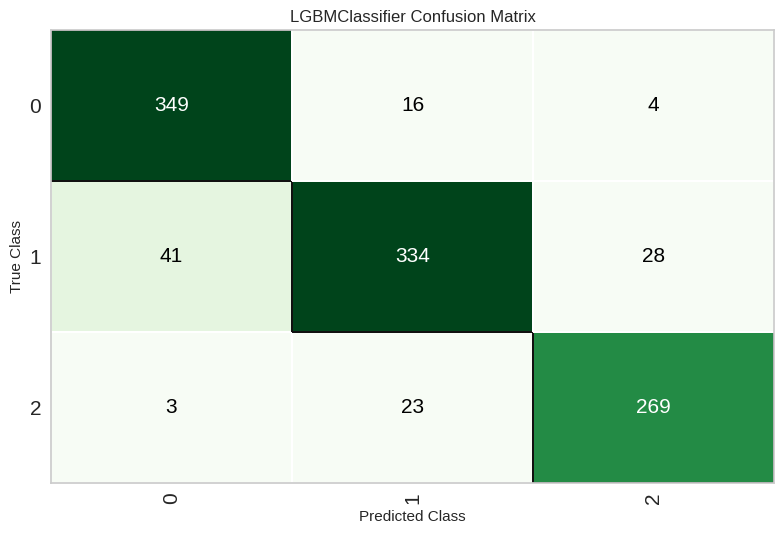

In [11]:
plot_model(rf, plot = 'confusion_matrix')

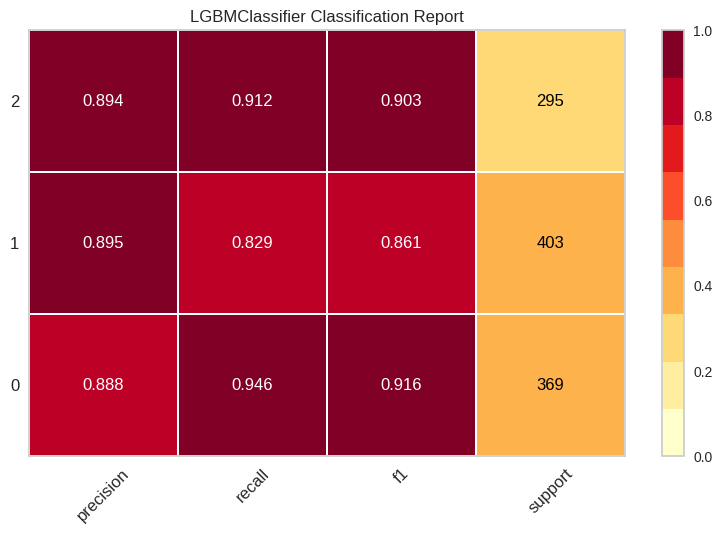

In [12]:
plot_model(rf, plot = 'class_report')

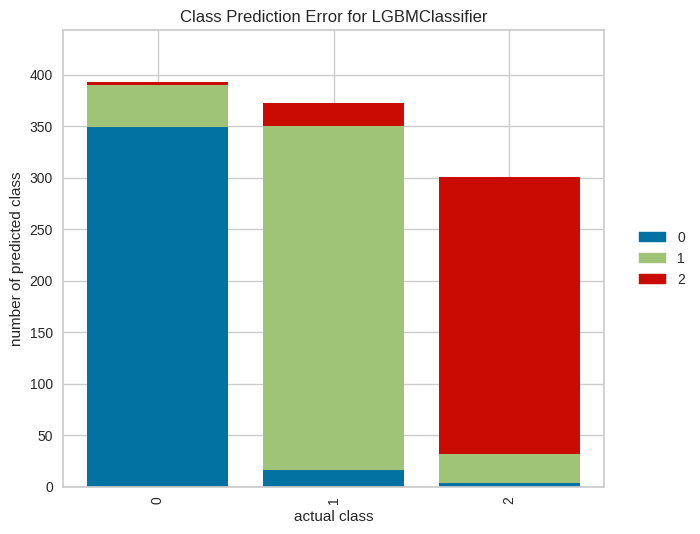

In [13]:
plot_model(rf, plot = 'error')

In [14]:
set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')
data3.dropna(axis=0, inplace=True)
                
data_unseen = data3
data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [15]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

# data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5562,0.7435,0.5562,0.6448,0.5322,0.3156,0.3653


array([[109,   1,   0],
       [122,  64,   0],
       [  0,  39,  30]])

In [16]:
unseen_predictions[['Rentabilidade 1M', 'Rentabilidade No mês']].loc[unseen_predictions['prediction_label'] == 1]

,Rentabilidade 1M,Rentabilidade No mês
21,0.184373,-0.069842
22,0.183760,-0.070259
23,0.184279,-0.070417
69,0.183761,-0.070640
98,0.183943,-0.070184
107,0.153829,-0.067699
112,0.154208,-0.067609
118,0.184511,-0.069701
119,0.184137,-0.070220
120,0.171415,-0.065017


In [17]:
set1 = set(cnpj4)
set2 = set(cnpj5)
matches01 = list(set1.intersection(set2))
data4  = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)]
rent1M = data0_5.loc[data0_5['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data4 = data4.merge(rent1M, how='inner', on='CNPJ do fundo')
data4.dropna(axis=0, inplace=True)

data_unseen = data4

data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [18]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4164,0.5618,0.4164,0.3649,0.3862,0.0770,0.0792


array([[ 45,  43,  26],
       [ 46, 105,   9],
       [ 58,  31,   2]])

In [19]:
unseen_predictions.loc[unseen_predictions['prediction_label'] == 1]

,CNPJ do fundo,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster,prediction_label,prediction_score
3,3919493000156,0.184861,0.075807,0.233281,0.892302,1.414284,0.230610,0.327599,0.283454,0.295077,...,1.416417,0.743662,0.325469,0.564444,0.345762,0.173856,0.073286,-1,1,0.9047
13,3929711000133,0.184373,0.076471,0.233488,0.892205,1.408833,0.229933,0.326358,0.282402,0.293939,...,1.421889,0.747683,0.313565,0.567088,0.346981,0.174544,0.070375,-1,1,0.9050
14,3904236000140,0.183760,0.074961,0.230113,0.881764,1.380689,0.229923,0.326351,0.282434,0.293974,...,1.390915,0.722554,0.307667,0.557954,0.339426,0.168678,0.069186,-1,1,0.9012
15,3917776000169,0.184279,0.075139,0.230876,0.884157,1.387503,0.230410,0.327013,0.283046,0.294328,...,1.394291,0.725549,0.310085,0.558932,0.340342,0.169467,0.069792,-1,1,0.9010
54,3914671000156,0.183943,0.075025,0.230791,0.883474,1.390847,0.230020,0.326844,0.282707,0.293899,...,1.397335,0.728778,0.319533,0.558785,0.340850,0.170172,0.071868,-1,1,0.9012
60,8828888000167,0.183761,0.073635,0.227707,0.872697,1.363992,0.230509,0.327288,0.283153,0.294471,...,1.361972,0.691091,0.259549,0.548980,0.332231,0.161457,0.058424,-1,1,0.9137
104,2838578000147,0.180333,0.073100,0.228258,0.875544,1.356584,0.225703,0.322631,0.280422,0.292587,...,1.378682,0.718303,0.308997,0.551768,0.336651,0.167762,0.069527,-1,1,0.8903
108,3555959000181,0.184511,0.076502,0.234169,0.891442,1.416263,0.230007,0.326647,0.282609,0.293577,...,1.426363,0.749648,0.329343,0.570392,0.348810,0.175279,0.074142,-1,1,0.9050
109,3916081000162,0.184137,0.075376,0.230748,0.883708,1.404507,0.229908,0.326425,0.282365,0.293822,...,1.403763,0.736478,0.316002,0.559992,0.341487,0.171558,0.070119,-1,1,0.9012
110,3919892000117,0.171415,0.072935,0.225962,0.870950,1.406225,0.212502,0.310157,0.271812,0.286658,...,1.447048,0.769271,0.348408,0.572461,0.351885,0.179050,0.078243,-1,1,0.8971


In [20]:
# data_unseen

In [21]:
# unseen_predictions = predict_model(rf, data=data_unseen)
# unseen_predictions.loc[unseen_predictions['prediction_label'] == 1]


In [22]:
# unseen_predictions.iloc[data_teste.loc[data_teste['Cluster'] == 1].index]

In [23]:
# abs(unseen_predictions['prediction_label']-data_teste['Cluster']).plot(figsize=(25,5))

In [24]:
#(data['Volatilidade No mês'].loc[ data['CNPJ do fundo'] == 8336054000134 ]).plot()
# data['Volatilidade 6 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()
#data['Volatilidade 3 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()

In [25]:
# data.loc[ data['CNPJ do fundo'] == 8336054000134 ]


In [26]:
final_rf = finalize_model(rf)

In [27]:
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Rentabilidade No mês',
                                             'Rentabilidade 3 meses',
                                             'Rentabilidade 6 meses',
                                             'Rentabilidade 12 meses',
                                             'Rentabilidade 24 meses',
                                             'Volatilidade No mês',
                                             'Volatili...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_de

In [28]:
predict_model(final_rf)

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster,prediction_label,prediction_score
47,0.045041,-0.086614,-0.057654,-0.177575,-0.177835,0.198283,0.225468,0.235169,0.220041,0.202239,...,-0.167641,-0.053509,-0.170683,-0.070456,-0.019318,-0.005817,-0.031927,-1,-1,0.9839
1836,0.095752,0.323170,0.249977,0.438640,0.223301,0.189383,0.209058,0.210903,0.238522,0.242006,...,1.633164,1.897626,0.109522,0.178330,0.224631,0.275643,0.021209,1,1,0.9834
962,-0.039991,-0.081123,0.131856,-0.120504,0.010523,0.277013,0.233478,0.321765,0.350514,0.351520,...,0.576812,0.514722,0.212285,0.266219,0.189755,0.184293,0.074235,-1,-1,0.9984
775,-0.040771,-0.078916,-0.079633,-0.123408,-0.094714,0.176965,0.180125,0.208586,0.213790,0.203507,...,-0.246860,-0.307969,-0.196233,-0.035423,-0.019228,-0.022384,-0.014073,0,0,0.9856
4525,-0.042838,0.114503,-0.005742,0.046581,0.078457,0.116729,0.136008,0.154220,0.162393,0.190179,...,-0.651815,-0.509745,-0.192801,-0.046286,-0.050447,-0.037503,-0.013998,0,0,0.9988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,-0.099187,-0.226023,0.093447,-0.072688,-0.200457,0.353526,0.283506,0.320930,0.347138,0.352123,...,0.508460,0.349105,0.162475,0.222667,0.168560,0.125675,0.057284,-1,-1,0.9975
4009,0.054117,0.127577,0.107907,0.232987,0.103630,0.133951,0.163515,0.153916,0.166328,0.196745,...,-0.396798,-0.196751,-0.095238,-0.070178,-0.037824,-0.018059,-0.010663,-1,-1,0.9896
3741,0.100385,0.055092,0.170561,0.241438,0.068978,0.152303,0.158696,0.155825,0.168879,0.205776,...,-0.363070,-0.012169,0.043379,-0.064934,-0.040878,-0.001285,0.005127,1,1,0.9819
2426,0.048279,0.270651,0.135500,0.228126,-0.218982,0.169923,0.165903,0.204110,0.232664,0.235929,...,0.149565,0.337817,0.287585,-0.047480,0.018642,0.042293,0.048851,-1,-1,0.9795


In [29]:
set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')
data3.dropna(axis=0, inplace=True)
                
data_unseen = data3
data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [30]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

# data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(final_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5726,0.7453,0.5726,0.6607,0.5505,0.3387,0.3878


array([[110,   0,   0],
       [117,  69,   0],
       [  0,  39,  30]])

In [37]:
set1 = set(cnpj4)
set2 = set(cnpj5)
matches01 = list(set1.intersection(set2))
data4  = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)]
rent1M = data0_5.loc[data0_5['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data4 = data4.merge(rent1M, how='inner', on='CNPJ do fundo')
data4.dropna(axis=0, inplace=True)

data_unseen = data4

data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [38]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(final_rf, data=data_unseen)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3918,0.5422,0.3918,0.3607,0.3686,0.0451,0.0464


In [39]:
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

array([[56, 31, 27],
       [72, 81,  7],
       [30, 55,  6]])

In [33]:
save_model(final_rf,'Final lightgbm2 Model 27Jun2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Rentabilidade No mês',
                                              'Rentabilidade 3 meses',
                                              'Rentabilidade 6 meses',
                                              'Rentabilidade 12 meses',
                                              'Rentabilidade 24 meses',
                                              'Volatilidade No mês',
                                              'Volatili...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_